# Neural Ordinary Differential Equations

##Summary


NeurIPS (Neural Information Processing System) is the largest AI conference in the world. About 4,854 papers were submitted (NeurIPS 2018) out of which 4 received the "Best paper" award. This is one of them. The basic idea is that neural networks are made up of stacked layers of simple computation nodes that work together to approximate a function. If we re-frame a neural network as an "Ordinary Differential Equation", we can use existing ODE solvers (like Euler's method) to approximate a function. This means no discrete layers, instead the network is a continous function and the result is that, there would be no need to mention the number of layers beforehand, we can mention the accuracy and the ODEnet would approximmate the whole network to that error margin. It's still early stages, but this could be as big a breakthrough as GANs!





##Why is this important?




1.  Faster testing time than recurrent networks, but slower training time., consumes less memory
2.  More accurate results for time series predictions  i.e continous-time models
Opens up a whole new realm for optimizing neural networks (Diff Equation Solvers)



##Differential Equations


A differential equation is a mathematical equation that relates some function with its derivatives. In applications, the functions usually represent physical quantities, the derivatives represent their rates of change, and the equation defines a relationship between the two

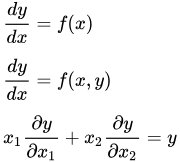

**"_Fig Above:- A simple Differential Equation_"**




---




![alt text](https://camo.githubusercontent.com/153e0361b86ebf7612d4f0f667736d4cbe005568/687474703a2f2f6879706572706879736963732e7068792d617374722e6773752e6564752f68626173652f4d6174682f696d6d6174682f646572696e742e676966)






 ######            ![alt text](https://revisionworld.com/sites/revisionworld.com/files/imce/differential.gif)





##Code For Differential Equation

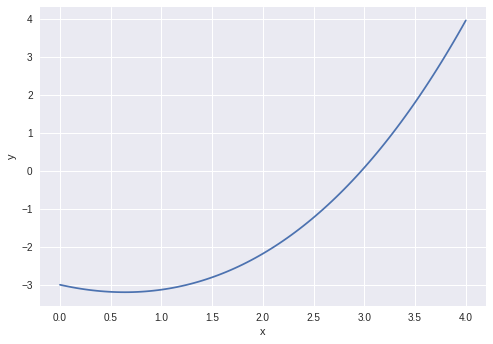

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function dy/dx = x + y/5.
func = lambda y,x : x + y/5.
# Initial condition
y0 = -3  # at x=0
# values at which to compute the solution (needs to start at x=0)
x = np.linspace(0, 4, 101)
# solution
y = odeint(func, y0, x)
# plot the solution, note that y is a column vector
plt.plot(x, y[:,0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


##Ordinary Differential Equation


Consider a simplified ODE from physics: we want to model the position x of a car. Assume we can calculate its velocity x′ (the derivative of position) at any position x. We know that the car starts at rest x(0)=0 and that its velocity at time t depends on its position through the formula:

$$ x^\prime(t) = f(x) $$
The Euler method solves this problem by following the physical intuition: my position at a time very close to the present depends on my current velocity and position. For example, if you are travelling at a velocity of 5 meters per second, and you travel 1 second, your position changes by 5 meters. If we travel h seconds, we will have travelled 5h meters. As a formula, we said:

$$x(t+h) = x(t) + h x^\prime(t),$$
but since we know

$$ x^\prime(t) = f(x) $$

we can rewrite this as..equation (1). Remember the equation below

$$ x(t+h) = x(t) + h f(x).$$    





##ResNet(2015)



Imagine a deep CNN architecture. Take that, double the number of layers, add a couple more, and it still probably isn’t as deep as the ResNet architecture that Microsoft Research Asia came up with in late 2015. ResNet is a new 152 layer network architecture that set new records in classification, detection, and localization through one incredible architecture. Aside from the new record in terms of number of layers, ResNet won ILSVRC 2015 with an incredible error rate of 3.6%

![alt text](https://adeshpande3.github.io/assets/ResNet.gif)



##Residual Block

The idea behind a residual block is that you have your input x go through conv-relu-conv series.This will give you some F(x).That result is then added to the original input x. Let’s call that H(x) = F(x) + x.In traditional CNNs, your H(x) would just be equal to F(x) right? So, instead of just computing that transformation (straight from x to F(x)), we’re computing the term that you have to add, F(x), to your input, x. Basically, the mini module shown below is computing a “delta” or a slight change to the original input x to get a slightly altered representation (When we think of traditional CNNs, we go from x to F(x) which is a completely new representation that doesn’t keep any information about the original x). 


# # ![alt text](https://adeshpande3.github.io/assets/ResNet.png)




The residual layer is actually quite simple: add the output of the activation function to the original input to the layer. As a formula, the k+1th layer has the formula:

$$ x_{k+1} = x_{k} + F(x_{k})$$
where F is the function of the kth layer and its activation. For example, F might represent a convolutional layer with a relu activation. This simple formula is a special case of the formula:

(Equation 2)

$$ x_{k+1} = x_{k} + h F(x_k),$$



Now you can see that equation (1) and equation (2) are the same.

you can see it looks just like the formula for ODE !

This observation has meant three things for designing neural networks:



1.   New neural network layers can be created through different numerical approaches to solving ODEs
2.   The possibility of arbitrarily deep neural networks

3.   Gradient descent can be viewed as applying Euler's method for solving ordinary differential  equation to gradient flow.

#![alt text](//camo.githubusercontent.com/a1da3a451fe610f93151dd9065f623778ac5442e/68747470733a2f2f77696b696d656469612e6f72672f6170692f726573745f76312f6d656469612f6d6174682f72656e6465722f7376672f66376566643234653963663334353038646638643430326135623938303132393061636232616663)


  



#ODENet


##Neural networks as differential equations

Consider a multi-layered neural network. We have an input layer and an output layer, and inbetween them, some number of hidden layers. As an input feeds forward through the network, it is progressively transformed, one layer at a time, from the input to the ultimate output. Each network layer is a step on that journey. If we take a small number of big steps, we end up with a rough approximation to the true transformation function we’d like to learn. If we take a much larger number of steps (deeper networks), with each step being individually smaller, we have a more accurate approximation to the true function. What happens in the limit as we take an infinite number of infinitely small steps?

So one way of thinking about those hidden layers is as steps in Euler’s method for solving differential equations

#![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Euler_method.svg/412px-Euler_method.svg.png)



We want to recover the blue curve, but all we have is an initial point A0 (think inputs to the network) and a differential equation. From the differential equation, we can calculate the tangent line. If we take a small step along the tangent line, we arrive at A1, which will be close to the desired blue line if the step is small enough. Repeat this process to uncover a polygonal curve A0,A1,A2..An



##What Does an ODENet Look like?

####*An ODE is a function that usually describes the change of some system through time. In this setting, time is a continuous variable. Now imagine a neural network is that system, and time is really something more like the depth of the network. It has a continuous number of layers*


*   
The team although didn't use Euler's method, they computed the exact ODE solution (within a small error tolerance) using adaptive solvers (which is faster).
*   
The dynamics change smoothly with depth. You can think of this either as having weights that are
a  function of depth, or as having shared weights across layers but adding the depth as an extra input to f.  Anywhere you can put a resnet you can put an ODEnet
* Each ODEBlock can be used to replace a whole stack of ResBlocks.
* In their MNIST example, each ODEBlock replaces 6 ResBlocks.

###Traditional Deep Nets

h1 = f1(x)

h2 = f2(h1)

h3 = f3(h2)

h4 = f3(h3)

y  = f5(h4)

###ResNets

h1 = f1(x)  + x

h2 = f2(h1) + h1

h3 = f3(h2) + h2

h4 = f4(h3) + h3

y  = f5(h4) + h4


Where f1, f2, etc are neural net layers.
The idea is that it's easier to model a small change to an almost-correct answer than to output the whole improved answer at once. -The above looks like a primitive ODE solver (Euler's method) that solves the trajectory of a system by just taking small steps in the direction of the dynamics of the and adding them up. -They connection allows for better training methods.
What if we define a deep net as a continuously evolving system?
Instead of updating the hidden units layer by layer, we define their derivative with respect to depth instead.

Many neural networks have a composition that looks exactly like the steps of Euler’s method. We start with an initial state z0, and apply successive transformations over time (layers):



$$ z1 = z0 +  f(z0,\theta0).$$   
$$ z2 = z1 +  f(z1,\theta1).$$   
$$ z3 = z2 +  f(z2,\theta2).$$...   and so on


In the limit, we parameterize the continuous dynamics of hidden units using an ordinary differential equation (ODE) specified by a neural network:

![alt text](https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+%5Cfrac%7Bd%5Cmathbf%7Bz%7D%28t%29%7D%7Bdt%7D+%3D+f%28%5Cmathbf%7Bz%7D%28t%29%2C+t%2C+%5Ctheta%29&bg=ffffff&fg=333333&s=0&zoom=1)


The equivalent of having T layers in the network, is finding the solution to this ODE at time T.


![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Fig-1.jpeg?w=480&zoom)



Euler’s method is perhaps the simplest method for solving ODEs. There since been more than 120 years of development of efficient and accurate ODE solvers. Modern ODE solvers provide guarantees about the growth of approximation error, monitor the level of error, and adapt their evaluation strategy on the fly to achieve the requested level of accuracy. This allows the cost of evaluating a model to scale with problem complexity.



##How to train a continuous-depth network ?

Question is how do you efficiently train a network defined as a differential equation? The answer lies in the adjoint method (which dates back to 1962). Think of the adjoint as the instantaneous analog of the chain rule.

This approach computes gradients by solving a second, augmented ODE backwards in time, and is applicable to all ODE solvers. This approach scales linearly with problem size, has low memory cost, and explicitly controls numerical error.


The adjoint captures how the loss function L changes with respect to the hidden state

![alt text](https://s0.wp.com/latex.php?latex=-+%5Cpartial+L+%2F+%5Cpartial+%5Cmathbf%7Bz%7D%28t%29&bg=ffffff&fg=333333&s=0&zoom=1)

Starting from the Output network, we can recompute $z({t})$ backwards in time together with the adjoint.


![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Fig-2.jpeg?w=480&)




A third integral then tells us how the loss changes with the parameters
###$$ \theta( dL/d\theta).$$

All three of these integrals can be computed in a single call to an ODE solver, which concatenates the original state, the adjoint, and the other partial derivatives into a single vector. Algorithm 1 shows how to construct the necessary dynamics, and call an ODE solver to compute all gradients at once. That is all I can possibly manage to explain at this point.


###![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Alg-1.jpeg?w=556&zoom=3)




##Applied Neural ODEs

###Residual Networks

This section tackles the good old MNIST problem, comparing an ODE-net to a ResNet with 6 residual blocks. The ODE-net replaces the residual blocks with an ODE-Solve module.

Concentrating on the **2nd and 4th lines** in the table below, ODE-Nets are able to achieve roughly the same performance as a ResNet, but using only about 1/3 of the parameters. Also note that the ODE-Net solution using constant memory, whereas ResNets use memory proportional to the number of layers.


##![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Table-1.jpeg?w=540&zoom=1)

##Time-series
This is the application which  caught my attention.

Applying neural networks to irregularly-sampled data such as medical records, network traffic, or neural spiking data is difficult. Typically, observations are put into bins of fixed duration, and the latent dynamics are discretized in the same way. This leads to difficulties with missing data and ill-defined latent variables… We present a continuous-time, generative approach to modeling time series. Our model represents each time series by a latent trajectory. Each trajectory is determined from a local initial state $\mathbf{z}_{t_0}$, and a global set of latent dynamics shared across all time series.

The model can be trained as a variational autoencoder, and it looks like this:

![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Fig-6.jpeg?w=566&zoom=2)



The evaluation here is based on a dataset of 1000 2-dimensional spirals, each starting at a different point. Half of the spirals are clockwise, and half counter-clockwise. Points are sampled from these trajectories at irregular timestamps. The figure below shows a latent neural ODE is better able to recover the spirals than a traditional RNN:

![alt text](https://adriancolyer.files.wordpress.com/2019/01/NODEs-Fig-8.jpeg?w=350&zoom=1)


Find the original repo [here](https://https://github.com/rtqichen/torchdiffeq)




###My Result:-

C:\torchdiffeq\examples>python ode_demo.py --viz

Iter 0020 | Total Loss 0.637604

No handles with labels found to put in legend.
Iter 0040 | Total Loss 0.693041

No handles with labels found to put in legend.
Iter 0060 | Total Loss 0.721506

No handles with labels found to put in legend.
Iter 0080 | Total Loss 0.332976

No handles with labels found to put in legend.
Iter 0100 | Total Loss 0.656128

No handles with labels found to put in legend.
Iter 0120 | Total Loss 0.641541

No handles with labels found to put in legend.
Iter 0140 | Total Loss 0.799464

No handles with labels found to put in legend.
Iter 0160 | Total Loss 0.263458

No handles with labels found to put in legend.
Iter 0180 | Total Loss 0.274314

![alt text](https://github.com/rtqichen/torchdiffeq/raw/master/assets/ode_demo.gif)

##Closing Summary of Neural ODE
A neural network is a popular type of machine learning model
Neural Networks are built with linear algebra and optimized using Calculus

* Neural networks consist of a series of "layers", which are just matrix operations

* Each layer introduces a little bit of error that compounds through the network
* The way to reduce that error is to add more and more layers
* The problem is that we see a drop off in performance after a certain # of layers
* A solution to this was proposed by Microsoft for the 2015 ImageNet competiton (residual networks)
* Residual Networks connect the output of previous layers to the output of new layers
* Prof. Duvenaud's team at University of Toronto noticed that that ResNets are similar to a primative * * "Ordinary Differential Equation" Solver called "Euler's Method"
* Ordinary Differential Equations involve one or more ordinary derivatives of unkown functions. 1 independent variable.
* Partial Differential Equations involve one or more partial derivatives of unknown functions. 2 or more independnet variables.
* Eulers method is a numerical method to sovle 1st order differential equations.
More efficient than Eulers method is the adjoint method. And this acts as our optimization strategy
The result? No need to specificy number of layers beforehand, now just specifiy accuracy. it will train itself.
* No more discrete layers, instead a continous computational block


**Applications** -Irregular time series data (medical history recorded at random times).